# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

In [2]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

RandomForestRegressor()

In [3]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss function')

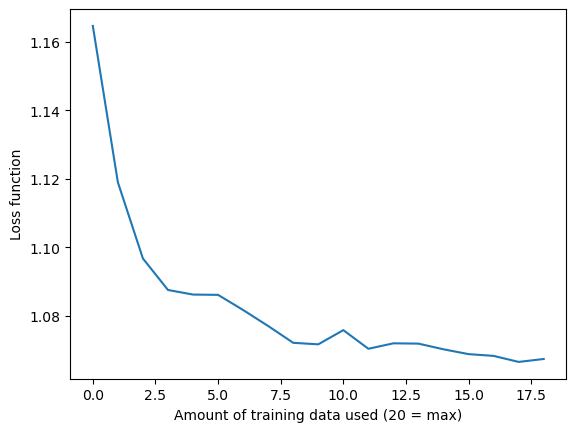

In [4]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [5]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

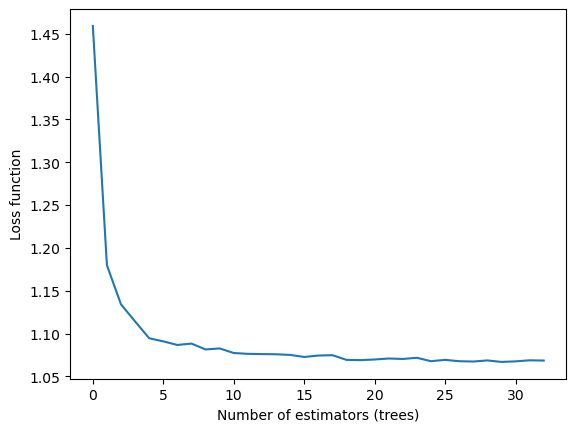

In [6]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

WEEKLY GRAPH QUESTION RESPONSE

Based on Vonnegut's rules, I would cut Plot 2 - Number of Trees vs. Loss.

REASONS FOR CUTTING PLOT 2
Rule 1. "Keep it simple"
  - Plot 1 tells a clearer and more universally useful story; More data = better generalization (up to a point).
  - Plot 2 may depend more on specific parameter tuning can't be as easily generalized.
  
Rule 2. "Have the guts to cut"
  - Although both plots may be interesting, one plot already teaches you the key message: model quality improves with more data. Plot 2 shows diminishing returns and a noisier trend, which may clutter the message as opposed to sharpen it.

WHICH IS MORE INTERESTING OR IMPORTANT?

Plot 1 is more important - It answers a foundational question: “How much data do I need?”, which is conceptually more useful. It also reveals overfitting or underfitting patterns when they exist.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

        Entity Code  Year  Excess mortality from fossil fuels
0  Afghanistan  AFG  2015                                2494
1       Africa  NaN  2015                               67132
2      Albania  ALB  2015                                1308
3      Algeria  DZA  2015                                2008
4       Angola  AGO  2015                                 622
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Entity                              190 non-null    object
 1   Code                                180 non-null    object
 2   Year                                190 non-null    int64 
 3   Excess mortality from fossil fuels  190 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 6.1+ KB
None
         Year  Excess mortality from fossil fuels
count   190.0                      

c:\Users\micha\.ipython\profile_default\log\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\micha\.ipython\profile_default\log\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\micha\.ipython\profile_default\log\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\micha\.ipython\profile_default\log\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    valida

Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Tuned Model R² score: -0.016966767013164796
Tuned Model RMSE: 490033.12762547436


C:\Users\micha\AppData\Local\Temp\ipykernel_33456\3906779607.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


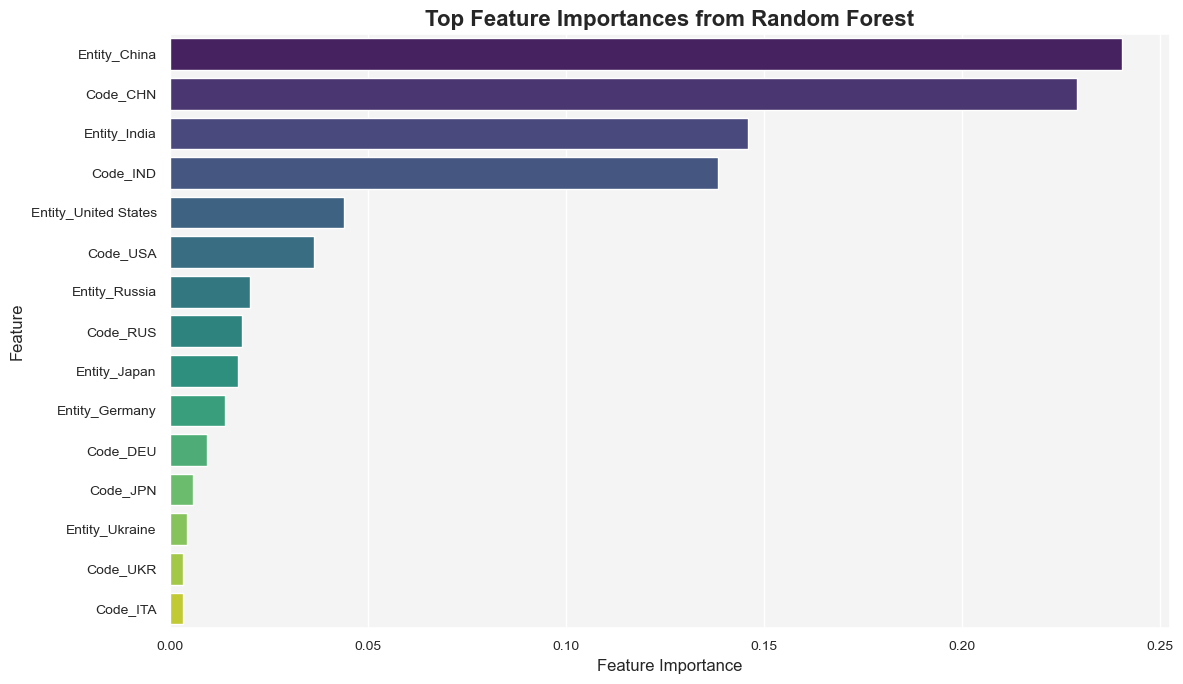

In [ ]:
df = pd.read_csv("pollution-deaths-from-fossil-fuels.csv")

print(df.head())
print(df.info())
print(df.describe())

df = df.dropna()

# Separate Features and Target
target_column = 'Excess mortality from fossil fuels'
y = df[target_column]
X = df.drop(columns=[target_column])

# One-hot Encode Categorical Columns
X = pd.get_dummies(X, drop_first=True)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Baseline model
baseline_rf = RandomForestRegressor(random_state=42)
baseline_rf.fit(X_train, y_train)
baseline_pred = baseline_rf.predict(X_test)

print("Baseline R² score:", r2_score(y_test, baseline_pred))
print("Baseline RMSE:", np.sqrt(mean_squared_error(y_test, baseline_pred)))

# Cross-Validation
cv_scores = cross_val_score(baseline_rf, X, y, cv=5, scoring='r2')
print(f"Cross-validated R²: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# Hyperparameter Tuning
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

print("Best hyperparameters:", random_search.best_params_)

# Final Evaluation
y_pred = best_model.predict(X_test)

print("Tuned Model R² score:", r2_score(y_test, y_pred))
print("Tuned Model RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Feature Importance Visualization
importances = best_model.feature_importances_
features = np.array(X.columns)
indices = np.argsort(importances)[::-1]

# Top N features
top_n = 15
top_indices = indices[:top_n]

top_features = features[top_indices]
top_importances = importances[top_indices]

palette = sns.color_palette("viridis", n_colors=top_n)

sns.set(style="darkgrid", rc={"axes.facecolor": "#f4f4f4"})

plt.figure(figsize=(12, 7))
sns.barplot(
    x=top_importances,
    y=top_features,
    palette=palette
)

plt.title("Top Feature Importances from Random Forest", fontsize=16, weight='bold')
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

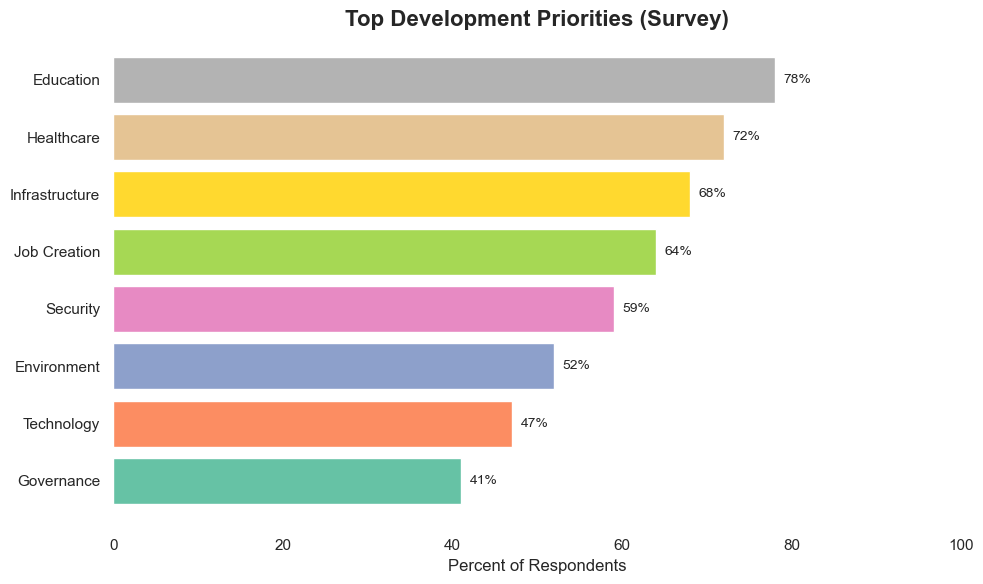

In [10]:
# Simulated Data
data = {
    'Development Priority': [
        'Education', 'Healthcare', 'Infrastructure', 'Job Creation',
        'Security', 'Environment', 'Technology', 'Governance'
    ],
    'Percent Support': [78, 72, 68, 64, 59, 52, 47, 41]
}

df = pd.DataFrame(data).sort_values('Percent Support', ascending=True)

custom_colors = sns.color_palette("Set2", len(df))

sns.set(style="white")
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(df['Development Priority'], df['Percent Support'], color=custom_colors)

# Data Labels
for bar in bars:
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            f'{width}%', va='center', fontsize=10)

ax.set_title('Top Development Priorities (Survey)', fontsize=16, weight='bold')
ax.set_xlabel('Percent of Respondents', fontsize=12)
ax.set_xlim(0, 100)

sns.despine(left=True, bottom=True)
ax.grid(False)
ax.set_axisbelow(True)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

plt.tight_layout()
plt.show()